In [1]:
import torch

In [2]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 1
z = 2 * y ** 2
r = z.mean()

In [3]:
print(f"Result : ", r)

Result :  tensor(8., grad_fn=<MeanBackward0>)


In [4]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


# Linear regression

In [36]:
import matplotlib.pyplot as plt
import random
import torch
import time

random.seed(time.time())

x = torch.FloatTensor(range(42)).unsqueeze(1)
y = random.randint(1, 42) ** x + torch.randn(42, 1)
num_featrus = x.shape[1]

In [37]:
w = torch.randn(num_featrus, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [38]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w, b], lr=learning_rate)

In [39]:
loss_stack = list()
for epoch in range(1001):
    optimizer.zero_grad()
    y_hat = torch.matmul(x, w) + b
    loss = torch.mean((y_hat - y) ** 2)
    
    loss.backward()
    optimizer.step()
    loss_stack.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch} : {loss.item()}")

Epoch 0 : inf
Epoch 100 : nan
Epoch 200 : nan
Epoch 300 : nan
Epoch 400 : nan
Epoch 500 : nan
Epoch 600 : nan
Epoch 700 : nan
Epoch 800 : nan
Epoch 900 : nan
Epoch 1000 : nan


In [40]:
with torch.no_grad():
    y_hat = torch.matmul(x, w) + b

print(f"Predict result :\n{y_hat}")

Predict result :
tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]])


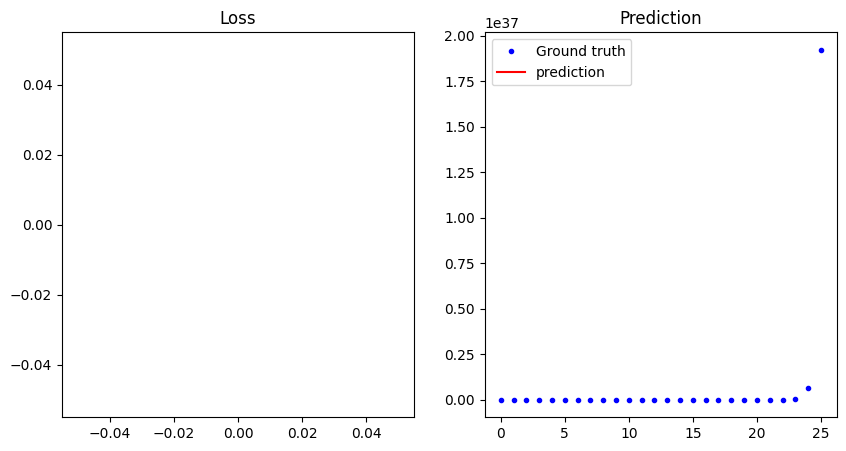

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")

plt.subplot(122)
plt.plot(x, y, '.b')
plt.plot(x, y_hat, 'r-')

plt.legend(['Ground truth', 'prediction'])
plt.title("Prediction")
plt.show()